In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from transformer_lens import HookedTransformer
from transformers import AutoModelForCausalLM, AutoTokenizer
from src import *


In [2]:
# llama = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-13b-chat-hf", torch_dtype=torch.bfloat16)
# tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-13b-chat-hf")

llama, tokenizer = load_model_from_transformers("meta-llama/Llama-2-13b-chat-hf")
hooked_llama = from_hf_to_tlens(llama, tokenizer, "llama-13b")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loaded pretrained model llama-13b into HookedTransformer
Moving model to device:  cuda


In [7]:
hooked_llama.to_tokens(" C")

tensor([[    1, 29871,   315]], device='cuda:0')

In [8]:
hooked_llama.to_tokens("(C")

tensor([[    1,   313, 29907]], device='cuda:0')

In [9]:
hooked_llama.tokenizer.decode([29871])

''

In [5]:
hooked_llama.tokenizer.decode([29907])

'C'

In [6]:
hooked_llama.tokenizer.decode([315])

'C'

In [36]:
lenient_sequence_results = torch.load('harsh_steering_results.pt')
harsh_sequence_results = torch.load('harsh_steering_results.pt')

In [45]:
lenient_sequence_results[position][layer][injection_coeff]['pos_preds']

tensor([[29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907],
        [29907

In [38]:
lenient_heat_map = torch.zeros((len(lenient_sequence_results), len(lenient_sequence_results[-6]), len(lenient_sequence_results[-6][10]))) # pos (-15 to -1) layer (5, 24) ic ([-5, -2, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 2, 5])
for pos_idx, position in enumerate(lenient_sequence_results.keys()):
    for layer_idx, layer in enumerate(lenient_sequence_results[position].keys()):
        for ic_idx, injection_coeff in enumerate(lenient_sequence_results[position][layer].keys()):
            pos_clean_count = (lenient_sequence_results[position][layer][injection_coeff]['pos_preds'] == 29907).sum()
            pos_toxic_count = (lenient_sequence_results[position][layer][injection_coeff]['pos_preds'] == 4986).sum()
            neg_clean_count = (lenient_sequence_results[position][layer][injection_coeff]['neg_preds'] == 29907).sum()
            neg_toxic_count = (lenient_sequence_results[position][layer][injection_coeff]['neg_preds'] == 4986).sum()
            total_clean_count = pos_clean_count + 
            lenient_heat_map[pos_idx][layer_idx][ic_idx] = prob_diff.mean()




In [39]:
max_steering_lenient_heat_map, indices = lenient_heat_map.max(dim=-1) # pos layer

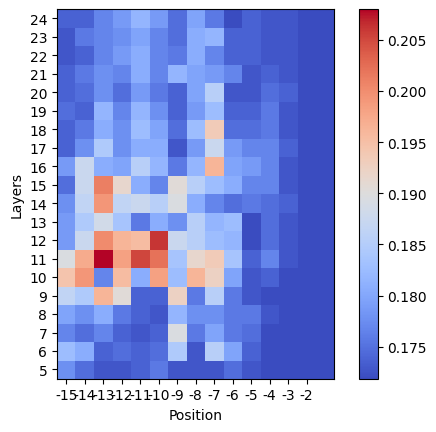

In [40]:
import matplotlib.pyplot as plt

# Assuming max_steering_lenient_heat_map is a 2D array or a DataFrame
plt.imshow(max_steering_lenient_heat_map.T, cmap='coolwarm', interpolation='nearest')

# Set the ticks
plt.yticks(range(20), range(5, 25))  # y-ticks now represent layers from 5 to 24
plt.xticks(range(14), range(-15, -1))  # x-ticks now represent position from -15 to -1

# Flip the y-axis to go the other way around
plt.gca().invert_yaxis()

# Label the axes
plt.xlabel('Position')
plt.ylabel('Layers')

plt.colorbar()
plt.show()
